# Finding the Number of Times a Miscellaneous Title Appears each Year (starting from 1902) in the IMDb Miscellaneous Dataset

## 1. Import the IMDb misc dataset

In [1]:
import csv

In [2]:
results = []

with open(file='/Users/vladobukhanich/Desktop/Desktop/github-local-repos/private/puppetry-datasets/IMDb_download_20160209/miscellaneous.list', newline='', encoding='latin-1') as inputfile:
    for row in csv.reader(inputfile):
        results.append(row)        

In [3]:
results[:50]

[['CRC: 0x3DEFA500  File: miscellaneous.list  Date: Fri Feb  5 00:00:00 2016'],
 [],
 ['Copyright 1994-2001 The Internet Movie Database',
  ' Inc.  All rights reserved.'],
 ['See the section at the end of this file for full details of the license.'],
 [],
 ['Welcome to the latest version of the miscellaneous filmography list. This'],
 ['is a "catch all" list for people in careers not covered by the other '],
 ['filmography lists. Anyone who worked on a movie can be listed here. The idea'],
 ['is to spin-off new filmography lists from this one if the volume of data'],
 ['relating to a particular type of contribution justifies a new separate list.'],
 [],
 ['  '],
 ['The Internet Movie Database consists of the following lists:               '],
 ['             '],
 [' List                 | Maintained by                             | Updated'],
 [' ---------------------|-------------------------------------------|----------'],
 [' Actors               | Giancarlo Cairella http://imdb.com

Get rid of all empty elements:

In [4]:
results = list(filter(lambda a: a != [], results))

In [5]:
results[:50]

[['CRC: 0x3DEFA500  File: miscellaneous.list  Date: Fri Feb  5 00:00:00 2016'],
 ['Copyright 1994-2001 The Internet Movie Database',
  ' Inc.  All rights reserved.'],
 ['See the section at the end of this file for full details of the license.'],
 ['Welcome to the latest version of the miscellaneous filmography list. This'],
 ['is a "catch all" list for people in careers not covered by the other '],
 ['filmography lists. Anyone who worked on a movie can be listed here. The idea'],
 ['is to spin-off new filmography lists from this one if the volume of data'],
 ['relating to a particular type of contribution justifies a new separate list.'],
 ['  '],
 ['The Internet Movie Database consists of the following lists:               '],
 ['             '],
 [' List                 | Maintained by                             | Updated'],
 [' ---------------------|-------------------------------------------|----------'],
 [' Actors               | Giancarlo Cairella http://imdb.com/contact| 24-06

## 2. Extract all years from - and count how many times the misc word of choice appears each year in - the dataset

In [6]:
years = []

len_year = 4

for line in results:
    sentence = line[0]
    
    for i in range(len(sentence)):
        if i <= len(sentence)-len_year-2:
            if sentence[i] == '(' and sentence[i+len_year+1] == ')':
                next_2_chars = sentence[i+1] + sentence[i+2]
    
                if next_2_chars == '19' or next_2_chars == '20':
                    next_4_chars = sentence[i+1] + sentence[i+2] + sentence[i+3] + sentence[i+4]

                    year = int(next_4_chars)

                    years.append(year)

In [7]:
len(years)

5198457

Get a list of only unique years that appear in the dataset:

In [8]:
set_years = set(years)

list_years = list(set_years)

In [9]:
len(list_years)

117

Create a dictionary where the count for each year will be stored:

In [10]:
count_years = {}

for year in list_years:
    count_years[year] = 0

### Define the misc word that will be searched for in the dataset:

In [6]:
misc_word = 'puppeteer'

### Count how many times the misc word of choice appears in the dataset, each year:

In [13]:
for line in results:
    sentence = line[0]
    
    for i in range(len(sentence)-1):
        char = sentence[i]
        
        next_index = i + 1
        
        next_char = sentence[next_index]
        
        rest_of_sentence = sentence[next_index:]
        
        if char == '(' and next_char.isalpha() and misc_word in rest_of_sentence:
            for year in list_years:
                if str(year) in sentence:
                    count_years[year] += 1
                    
                    break

In [14]:
sort_count_years = sorted(count_years.items()) # sorted by key, return a list of tuples

x0, y0 = zip(*sort_count_years) # unpack a list of pairs into two tuples

Plot the dictionary:

In [16]:
import matplotlib.pylab as plt

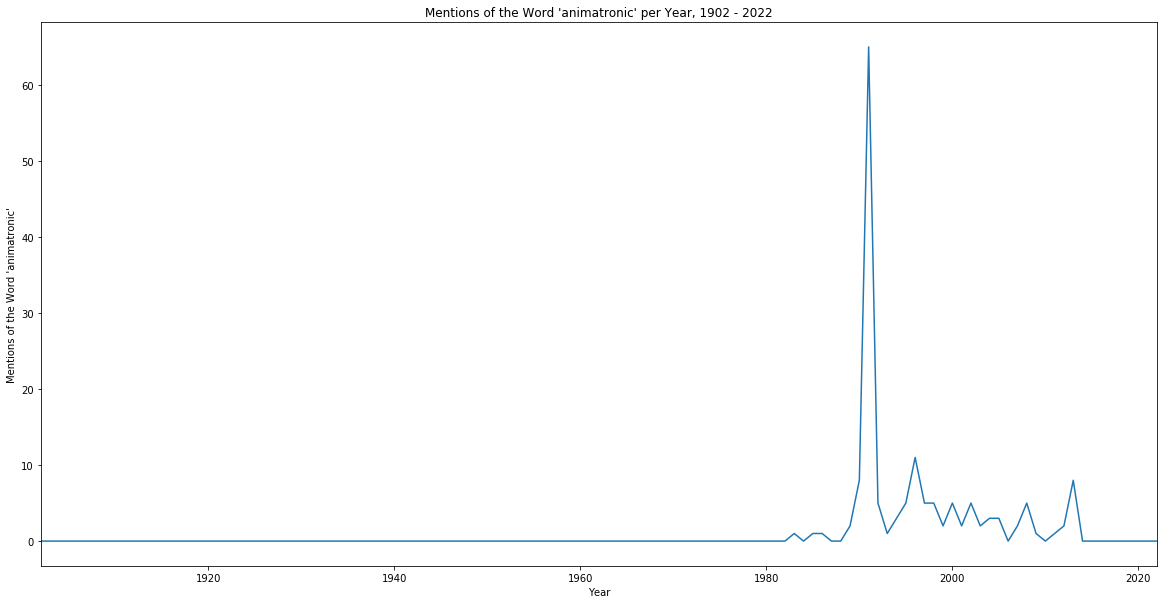

In [17]:
plt.figure(figsize=(20,10))

line0 = plt.plot(x0, y0)

plt.xlabel('Year')

plt.xlim(1902, 2022)

plt.ylabel("Mentions of the Word '" + misc_word + "'")

plt.title("Mentions of the Word '" + misc_word + "' per Year, 1902 - 2022")

plt.show()

## 3. Extract all titles that contain the misc word of choice

In [18]:
misc_titles = []

for line in results:
    sentence = line[0]
    
    for i in range(len(sentence)-1):
        char = sentence[i]
        
        next_index = i + 1

        next_char = sentence[next_index]
        
        rest_of_sentence = sentence[next_index:]

        if char == '(' and next_char.isalpha() and misc_word in rest_of_sentence:
            misc_title = ''

            while next_char != ')' and next_index != len(sentence)-1:
                misc_title += next_char
                
                next_index += 1
                
                next_char = sentence[next_index]
            misc_titles.append(misc_title)

            break

## (Temporary Section for finding the names of productions causing spikes in years 1972, 1992, 2004, and 2005)

In [46]:
misc_sents_72 = []

misc_sents_92 = []

misc_sents_04 = []

misc_sents_05 = []

for line in results:
    sentence = line[0]
    
    for i in range(len(sentence)-1):
        char = sentence[i]
        
        next_index = i + 1

        next_char = sentence[next_index]
        
        rest_of_sentence = sentence[next_index:]

        if char == '(' and next_char.isalpha() and misc_word in rest_of_sentence:
            if '(' + str(1972) + ')' in sentence:
                misc_sents_72.append(sentence)
                
                break
            if '(' + str(1992) + ')' in sentence: 
                misc_sents_92.append(sentence)
                
                break
            if '(' + str(2004) + ')' in sentence:
                misc_sents_04.append(sentence)
                
                break
            if '(' + str(2005) + ')' in sentence:
                misc_sents_05.append(sentence)

                break

In [50]:
uniq_misc_sents_72 = list(set(misc_sents_72))

uniq_misc_sents_92 = list(set(misc_sents_92))

uniq_misc_sents_04 = list(set(misc_sents_04))

uniq_misc_sents_05 = list(set(misc_sents_05))

In [51]:
misc_ttls_72 = []

misc_ttls_92 = []

misc_ttls_04 = []

misc_ttls_05 = []

In [52]:
for sent in uniq_misc_sents_72:    
    ttl = sent[0:sent.find('(')]
    
    misc_ttls_72.append(ttl)
for sent in uniq_misc_sents_92:
    ttl = sent[0:sent.find('(')]
    
    misc_ttls_92.append(ttl)
for sent in uniq_misc_sents_04:
    ttl = sent[0:sent.find('(')]
    
    misc_ttls_04.append(ttl)
for sent in uniq_misc_sents_05:
    ttl = sent[0:sent.find('(')]
    
    misc_ttls_05.append(ttl)

In [54]:
uniq_misc_ttls_72 = list(set(misc_ttls_72))

uniq_misc_ttls_92 = list(set(misc_ttls_92))

uniq_misc_ttls_04 = list(set(misc_ttls_04))

uniq_misc_ttls_05 = list(set(misc_ttls_05))

In [59]:
count_misc_ttls_72 = {}

count_misc_ttls_92 = {}

count_misc_ttls_04 = {}

count_misc_ttls_05 = {}

In [60]:
for ttl in uniq_misc_ttls_72:
    count_misc_ttls_72[ttl] = 0
    
for ttl in uniq_misc_ttls_92:
    count_misc_ttls_92[ttl] = 0

for ttl in uniq_misc_ttls_04:
    count_misc_ttls_04[ttl] = 0
    
for ttl in uniq_misc_ttls_05:
    count_misc_ttls_05[ttl] = 0

In [63]:
for sent in misc_sents_72:
    for ttl in uniq_misc_ttls_72:
        if ttl in sent:
            count_misc_ttls_72[ttl] += 1
            
            break
            
for sent in misc_sents_92:
    for ttl in uniq_misc_ttls_92:
        if ttl in sent:
            count_misc_ttls_92[ttl] += 1
            
            break
            
for sent in misc_sents_04:
    for ttl in uniq_misc_ttls_04:
        if ttl in sent:
            count_misc_ttls_04[ttl] += 1
            
            break
            
for sent in misc_sents_05:
    for ttl in uniq_misc_ttls_05:
        if ttl in sent:
            count_misc_ttls_05[ttl] += 1
            
            break

## (End of Section)

In [19]:
len(misc_titles)

147

Get a list of only unique titles with the misc word in them:

In [20]:
set_misc_ttls = set(misc_titles)

list_misc_ttls = list(set_misc_ttls)

In [21]:
len(list_misc_ttls)

38

Truncate the titles that are too specific (only leave the part before the colon) and double check that all titles contain the misc word of choice:

In [22]:
for i in range(len(list_misc_ttls)):
    if ':' in list_misc_ttls[i]: 
        list_misc_ttls[i] = list_misc_ttls[i][:list_misc_ttls[i].find(':')]
    if misc_word not in list_misc_ttls[i]:
        list_misc_ttls[i] = ''

In [23]:
list_misc_ttls

['animatronic supervisor',
 'animatronics engineer',
 'animatronic effects',
 'animatronic creature design and effects',
 'animatronic mechanics',
 'animatronic performance supervisor',
 'animatronic effects supervisor',
 'animatronic puppeteers',
 'animatronic monitor assistant',
 'animatronic puppeteer',
 'animatronic design',
 'animatronic puppeteers',
 'animatronic baby effects supervisor',
 'animatronic consultant',
 '',
 'animatronic assistant',
 'animatronic puppeteers',
 'animatronic animal constructor',
 'animatronic monkey creator',
 'animatronic designer/puppeteer',
 'animatronics puppeteer',
 'animatronic puppeteers',
 'live/animatronic effects',
 'animatronics and puppets crew',
 '',
 'animatronic trainee',
 '',
 '',
 'live action animatronic puppets',
 'animatronic designer',
 '',
 'animatronic puppeteer',
 'animatronic puppeteer',
 '',
 'terminator and animatronic effects',
 '',
 '',
 'animatronic moose assistant']

In [24]:
new_set_misc_ttls = set(list_misc_ttls)

new_list_misc_ttls = list(new_set_misc_ttls)

new_list_misc_ttls = list(filter(lambda a: a != '', new_list_misc_ttls))

In [25]:
new_list_misc_ttls

['animatronic supervisor',
 'animatronics engineer',
 'animatronic effects',
 'animatronic creature design and effects',
 'animatronic mechanics',
 'animatronic performance supervisor',
 'animatronic effects supervisor',
 'animatronic monitor assistant',
 'animatronic puppeteer',
 'animatronic baby effects supervisor',
 'animatronic design',
 'animatronic consultant',
 'animatronic assistant',
 'animatronic animal constructor',
 'animatronic monkey creator',
 'animatronic designer/puppeteer',
 'animatronics puppeteer',
 'live/animatronic effects',
 'animatronics and puppets crew',
 'live action animatronic puppets',
 'animatronic designer',
 'terminator and animatronic effects',
 'animatronic trainee',
 'animatronic puppeteers',
 'animatronic moose assistant']

## 4. Count how many times each of the titles containing the misc word appears in the dataset, each year, and store the results in a matrix 

### Create a 2 dimensional dataframe to store the count of each title for each year:

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame(index=list_years, columns=new_list_misc_ttls)

df = df.fillna(0)

In [28]:
df

,animatronic supervisor,animatronics engineer,animatronic effects,animatronic creature design and effects,animatronic mechanics,animatronic performance supervisor,animatronic effects supervisor,animatronic monitor assistant,animatronic puppeteer,animatronic baby effects supervisor,...,animatronic designer/puppeteer,animatronics puppeteer,live/animatronic effects,animatronics and puppets crew,live action animatronic puppets,animatronic designer,terminator and animatronic effects,animatronic trainee,animatronic puppeteers,animatronic moose assistant
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Populate the matrix with counts:

In [29]:
for line in results:
    sentence = line[0]
    
    for i in range(len(sentence)-1):
        char = sentence[i]
        
        next_index = i + 1
        
        next_char = sentence[next_index]
        
        if char == '(':
            inside_parenth = ''
            
            while next_index != len(sentence)-1 and next_char != ')':
                inside_parenth += next_char
                
                next_index += 1
                
                next_char = sentence[next_index]
            for ttl in new_list_misc_ttls:
                if ttl in inside_parenth:
                    for year in list_years:
                        if str(year) in sentence:
                            df[ttl][year] += 1
                            
                            break

In [30]:
df

,animatronic supervisor,animatronics engineer,animatronic effects,animatronic creature design and effects,animatronic mechanics,animatronic performance supervisor,animatronic effects supervisor,animatronic monitor assistant,animatronic puppeteer,animatronic baby effects supervisor,...,animatronic designer/puppeteer,animatronics puppeteer,live/animatronic effects,animatronics and puppets crew,live action animatronic puppets,animatronic designer,terminator and animatronic effects,animatronic trainee,animatronic puppeteers,animatronic moose assistant
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Export the matrix to Excel

In [31]:
from pandas import ExcelWriter

In [32]:
file_name = ExcelWriter('/Users/vladobukhanich/Desktop/Desktop/Data Analytics Projects/Puppeteers/IMDb_Animatronic_Matrix.xlsx')

df.to_excel(file_name, 'Sheet1')

file_name.save()